nodes:  1000 links  2974


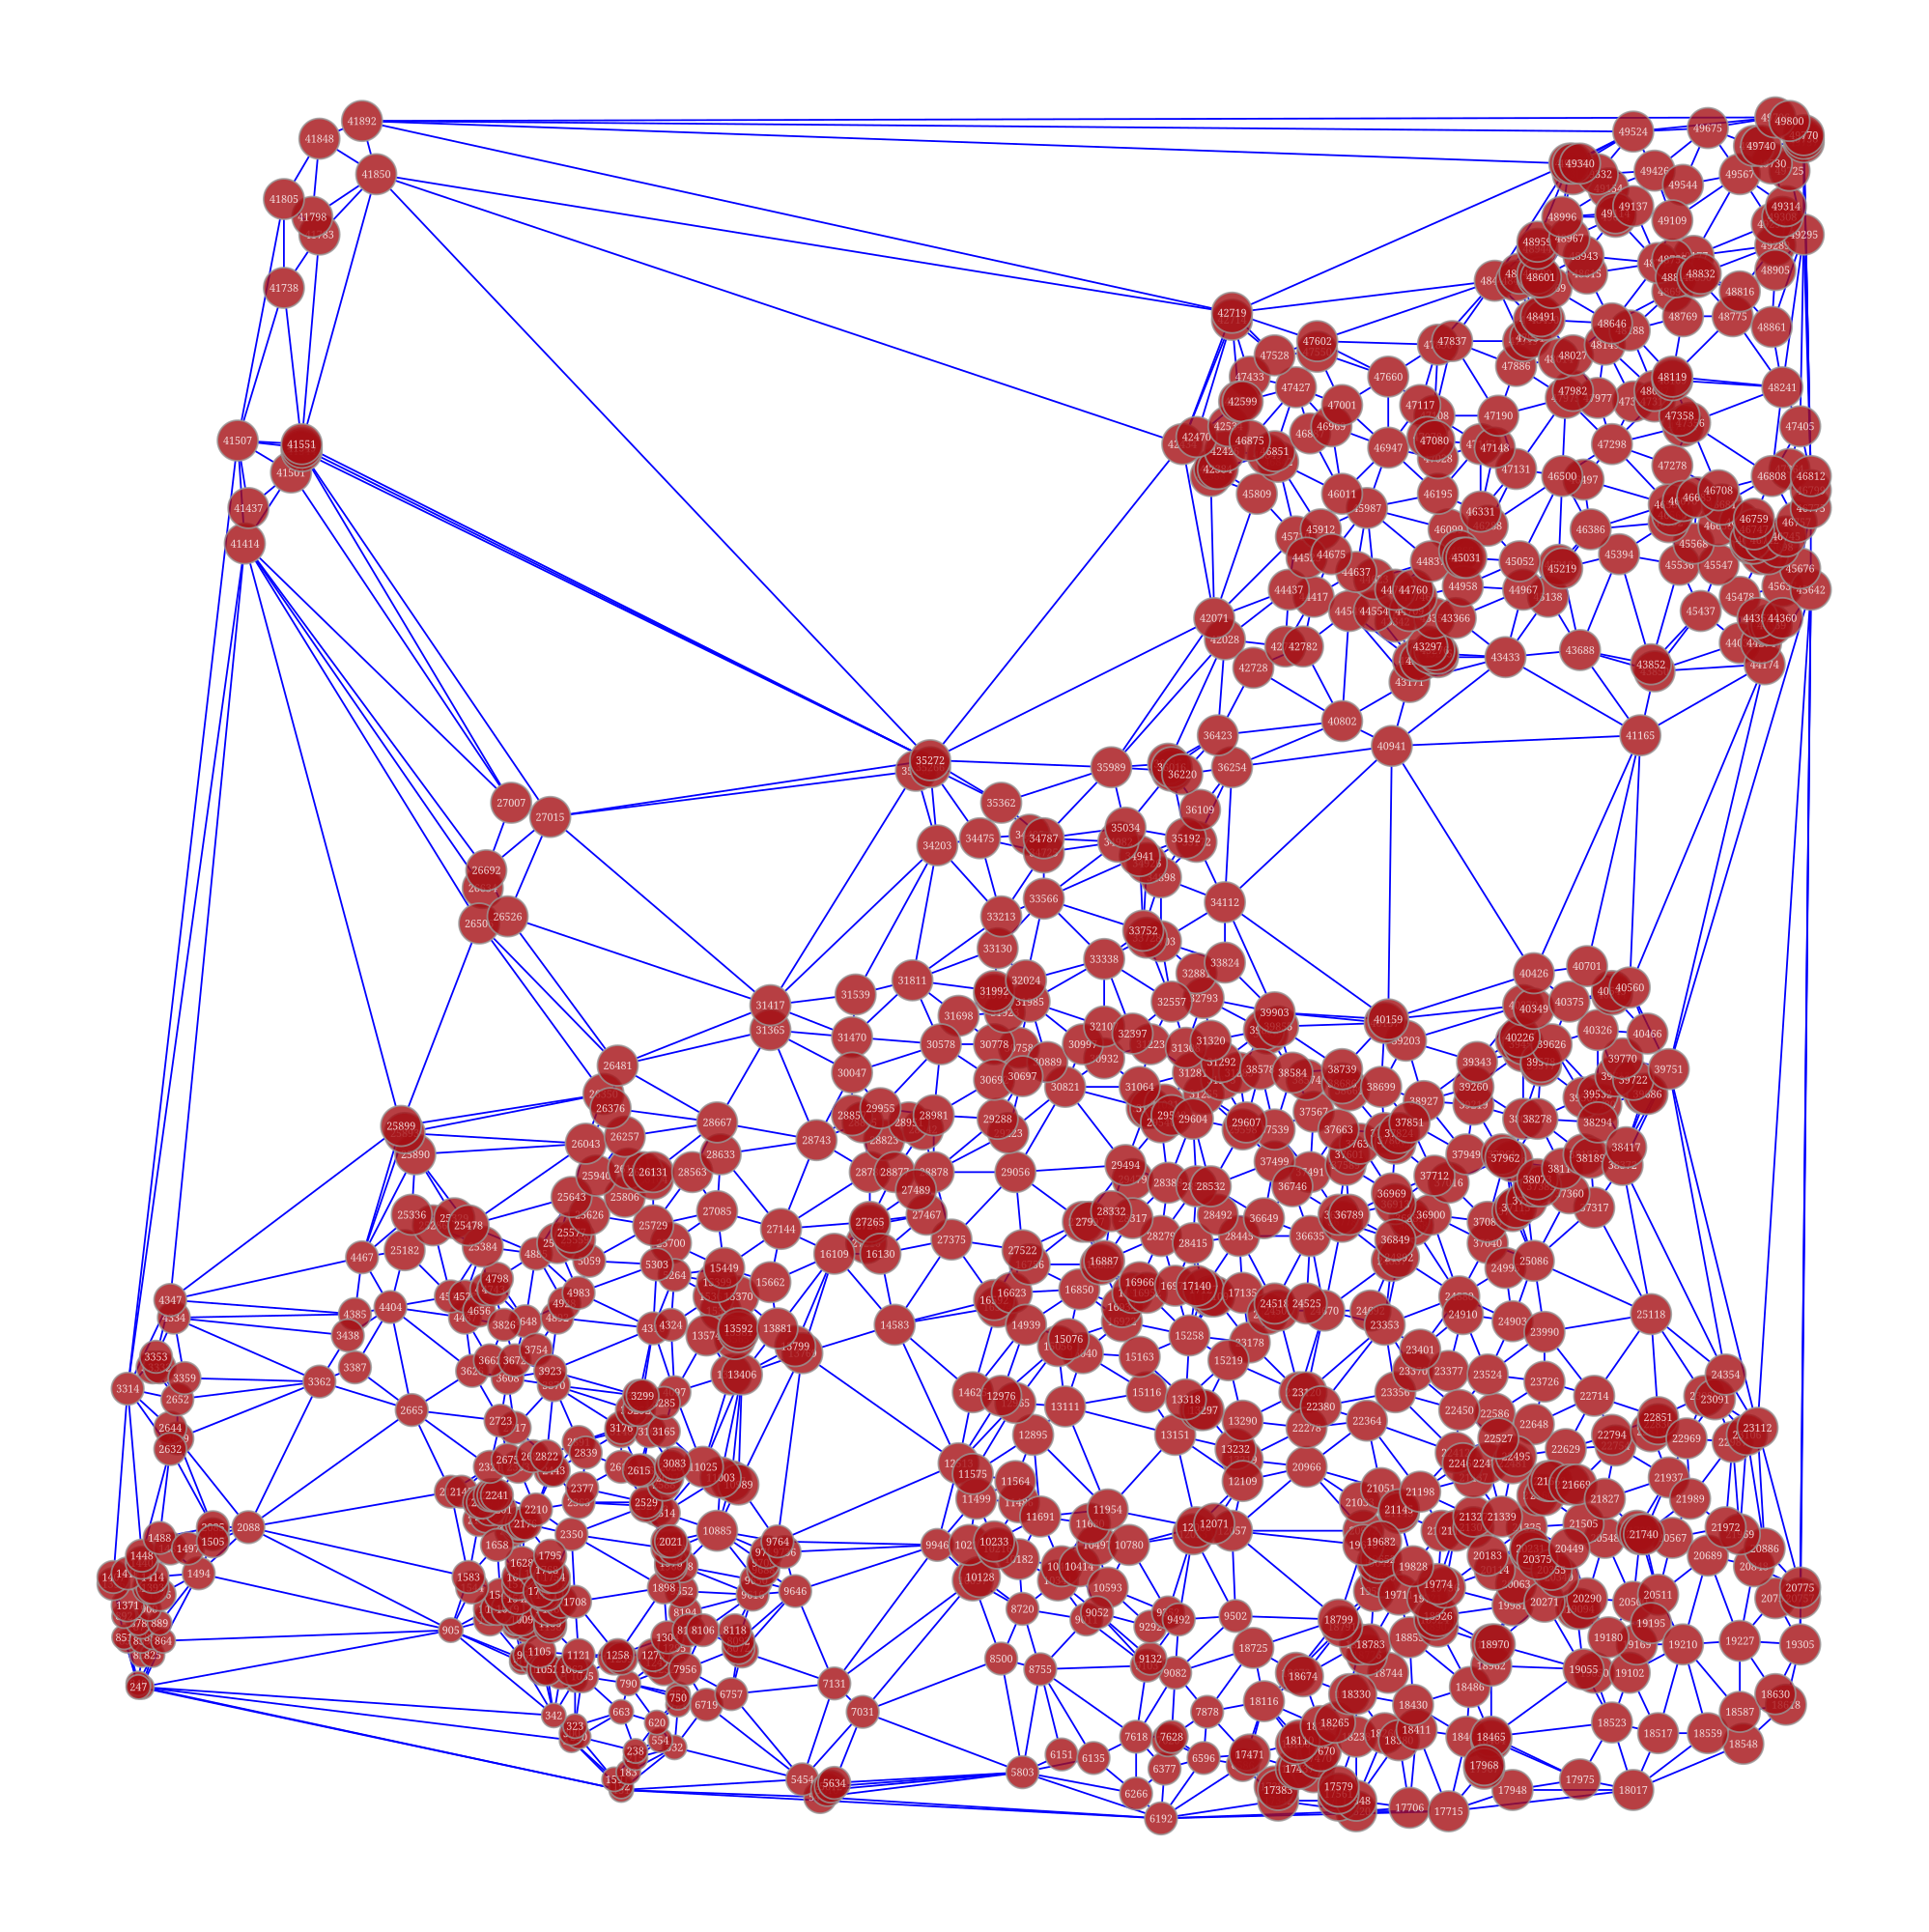

Calculating shortest paths: 100%|██████████| 499500/499500 [01:18<00:00, 6394.18it/s]


Shortest paths have been saved to ./output/output_text/fukuoka_ascend_1000_dt_shortest_paths.csv
Overall Total Distance: 5164640
Overall Average Distance: 10.33961961961962


In [3]:
from graph_tool import draw
import python_codes.files_operators
import python_codes.progress_bar
import python_codes.shortest_paths

# 读取网络图像
types = 'dt'
city = 'fukuoka'
sort = 'ascend'
scale = '1000'
read_graph, read_pos = python_codes.files_operators.read_files(f"../networks_clusters/{city}_{sort}_{scale}_{types}.net", True)
print("nodes: ", read_graph.num_vertices(), "links ", read_graph.num_edges())

# 绘制网络图像
draw.graph_draw(read_graph, read_pos, vertex_text=read_graph.vertex_properties["number"], edge_color='blue', output_size=(1000, 1000))
draw.graph_draw(read_graph, read_pos, vertex_text=read_graph.vertex_properties["number"], edge_color='blue', output_size=(1000, 1000), output=f'./output/output_text/{city}_{sort}_{scale}_{types}.pdf')

# 获取节点的显示序号
vertex_numbers = read_graph.vertex_properties["number"]

# 创建顶点序号列表
node_indices = [int(vertex_numbers[v]) for v in read_graph.vertices()]

# 初始化进度条
progress_bar = python_codes.progress_bar.ProgressBar(total=len(node_indices) * (len(node_indices) - 1) // 2, desc='Calculating shortest paths')

# 计算所有节点对之间的最短路径
distances, total_distance_sum, overall_average_distance = python_codes.shortest_paths.calculate_shortest_paths(read_graph, node_indices, progress_bar)

progress_bar.close()  # 关闭进度条

# 保存距离矩阵到CSV文件
python_codes.shortest_paths.save_to_csv(node_indices, distances, total_distance_sum, overall_average_distance, f"./output/output_text/{city}_{sort}_{scale}_{types}_shortest_paths.csv")
